In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import seaborn as sns

In [2]:
# to avoid the memory error, this function is created to load the data in chunks
def json_chunks(file_path, chunksize=10000):
    chunks = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for chunk in pd.read_json(file, lines=True, chunksize=chunksize):
            chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)


In [3]:
# df_checkin = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_dataset/yelp_academic_dataset_checkin.json", chunksize=10000)
# df_tips = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_dataset/yelp_academic_dataset_tip.json", chunksize=10000)

In [4]:
df_review = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_dataset/yelp_academic_dataset_review.json", chunksize=10000)

In [5]:
df_user = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_dataset/yelp_academic_dataset_user.json", chunksize=10000)

In [6]:
# Loading the json files
df_business = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_dataset/yelp_academic_dataset_business.json", chunksize=10000)

In [7]:
df_business.shape

(150346, 14)

In [8]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
# df_photo = json_chunks("D:/Loyalist Subjects/Semester 3/2024F-T3 AISC2007 - Deep Learning 01/Deep Learning1st graded/yelp_photos/photos.json", chunksize=10000)

In [10]:
#Creating a DataFrame with binary indicators for each attribute
attributes_data = pd.json_normalize(df_business['attributes'])
attributes_data

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,False,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,NaN,True,True,2,NaN,NaN,NaN,NaN,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,NaN,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,NaN,True,True,4,NaN,None,None,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Concatenate the new attributes DataFrame with the business features
business_data = pd.concat([df_business, attributes_data], axis=1)

In [12]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [13]:
# Check for missing values
missing_percentage = (business_data.isnull().sum() * 100) / business_data.shape[0]
missing_percentage

business_id                    0.000000
name                           0.000000
address                        0.000000
city                           0.000000
state                          0.000000
postal_code                    0.000000
latitude                       0.000000
longitude                      0.000000
stars                          0.000000
review_count                   0.000000
is_open                        0.000000
attributes                     9.141580
categories                     0.068509
hours                         15.446370
ByAppointmentOnly             71.838958
BusinessAcceptsCreditCards    20.340415
BikeParking                   51.686111
RestaurantsPriceRange2        43.254892
CoatCheck                     96.285901
RestaurantsTakeOut            60.187168
RestaurantsDelivery           62.565017
Caters                        73.310231
WiFi                          62.144653
BusinessParking               39.416413
WheelchairAccessible          80.742421


In [14]:
# Drop columns with high missing values ( > 50%)
business_data = business_data.dropna(axis=1, thresh=0.5*business_data.shape[0])

In [15]:
# Fill or drop remaining missing values based on data requirements
business_data['BusinessParking'].fillna('None', inplace=True)

In [16]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [17]:
# # Concatenate the new attributes DataFrame with the business features
# business_data = pd.concat([business_data, categories_data], axis=1)

NameError: name 'categories_data' is not defined

In [18]:
business_data['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [19]:
business_data['categories'] = business_data['categories'].fillna('')

In [20]:
categories_split = business_data['categories'].str.split(', ')
categories_exploded = categories_split.explode()

In [21]:
category_counts = categories_exploded.value_counts()

In [22]:
top_10_categories = category_counts.head(10).index.tolist()
for category in top_10_categories:
    business_data[category] = business_data['categories'].apply(lambda x: 1 if category in x else 0)

In [23]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150346 non-null  object 
 13  hours         

In [24]:
business_cleaned = business_data.drop(columns=['attributes', 'categories','address'])

In [25]:
business_cleaned['BusinessParking'].iloc[2]

"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"

In [26]:
import ast

# Function to extract parking attributes
def extract_parking_info(parking_info):
    if pd.isna(parking_info) or parking_info is None or parking_info == 'None':
        return 0, 0, 0, 0, 0 
    try:
        parking_dict = ast.literal_eval(parking_info)  
        return (
            int(parking_dict.get('garage', False)),
            int(parking_dict.get('street', False)),
            int(parking_dict.get('validated', False)),
            int(parking_dict.get('lot', False)),
            int(parking_dict.get('valet', False))
        )
    except (ValueError, SyntaxError, TypeError):
        return 0, 0, 0, 0, 0  

# Apply the function and create new columns
business_cleaned[['garage', 'street', 'validated', 'lot', 'valet']] = business_cleaned['BusinessParking'].apply(
    lambda x: pd.Series(extract_parking_info(x))
)

# Drop the original BusinessParking column if no longer needed
business_cleaned.drop(columns=['BusinessParking'], inplace=True)

In [27]:
business_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   city                        150346 non-null  object 
 3   state                       150346 non-null  object 
 4   postal_code                 150346 non-null  object 
 5   latitude                    150346 non-null  float64
 6   longitude                   150346 non-null  float64
 7   stars                       150346 non-null  float64
 8   review_count                150346 non-null  int64  
 9   is_open                     150346 non-null  int64  
 10  hours                       127123 non-null  object 
 11  BusinessAcceptsCreditCards  119765 non-null  object 
 12  RestaurantsPriceRange2      85314 non-null   object 
 13  Restaurants   

In [28]:
# duplicate_count = df_review['business_id'].duplicated().sum()
# print(f"Number of duplicates in df_review: {duplicate_count}")

Number of duplicates in df_review: 6839934


In [88]:
# Merging the business data with review data on business_id
merged= business_cleaned.merge(df_review, on='business_id', how ='left')

In [89]:
merged_data=merged

In [90]:
merged_data.shape

(6990280, 36)

In [91]:
merged_data.isnull().sum()

business_id                         0
name                                0
city                                0
state                               0
postal_code                         0
latitude                            0
longitude                           0
stars_x                             0
review_count                        0
is_open                             0
hours                          398286
BusinessAcceptsCreditCards     536326
RestaurantsPriceRange2        1207177
Restaurants                         0
Food                                0
Shopping                            0
Home Services                       0
Beauty & Spas                       0
Nightlife                           0
Health & Medical                    0
Local Services                      0
Bars                                0
Automotive                          0
garage                              0
street                              0
validated                           0
lot         

In [92]:
columns_to_drop = ['hours', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2']
merged_data.drop(columns=columns_to_drop, inplace=True)

In [93]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 33 columns):
 #   Column            Dtype         
---  ------            -----         
 0   business_id       object        
 1   name              object        
 2   city              object        
 3   state             object        
 4   postal_code       object        
 5   latitude          float64       
 6   longitude         float64       
 7   stars_x           float64       
 8   review_count      int64         
 9   is_open           int64         
 10  Restaurants       int64         
 11  Food              int64         
 12  Shopping          int64         
 13  Home Services     int64         
 14  Beauty & Spas     int64         
 15  Nightlife         int64         
 16  Health & Medical  int64         
 17  Local Services    int64         
 18  Bars              int64         
 19  Automotive        int64         
 20  garage            int64         
 21  street  

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['city', 'state', 'name'] 

# Apply label encoding to each categorical column
for col in categorical_cols:
    merged_data[col] = label_encoder.fit_transform(merged_data[col].astype(str))

merged_data.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,...,lot,valet,review_id,user_id,stars_y,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,2212,1007,2,93101,34.426679,-119.711197,5.0,7,0,...,0,0,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38
1,Pns2l4eNsfO8kk83dixA6A,2212,1007,2,93101,34.426679,-119.711197,5.0,7,0,...,0,0,OXgg1LdxHDv3CBU5-xi2lA,_Q0fdLVoTnlNkEypUvNkHA,5,1,0,0,Abby is an amazing practitioner. In a treatmen...,2013-03-01 06:11:05
2,Pns2l4eNsfO8kk83dixA6A,2212,1007,2,93101,34.426679,-119.711197,5.0,7,0,...,0,0,DG64cjud9cWB4fANskVxSw,ycUooVIDWPgXPf6niW-FWQ,4,2,0,0,I went to see Abby for some digestive issues. ...,2013-01-17 00:05:43
3,Pns2l4eNsfO8kk83dixA6A,2212,1007,2,93101,34.426679,-119.711197,5.0,7,0,...,0,0,hzvRRb40oPttxAdyr7kfow,CiwVvb7jWijWB5jkmatzKA,5,0,1,0,"Abby helped me with some longstanding issues, ...",2015-03-16 03:43:08
4,Pns2l4eNsfO8kk83dixA6A,2212,1007,2,93101,34.426679,-119.711197,5.0,7,0,...,0,0,xUkBPk-QfcW4i3MRU5TeXw,QkCbMKBktkrkOFJugHvY6w,5,0,0,0,"Recently, I referred a patient of mine with mu...",2013-03-05 18:45:07


In [173]:
features_data = merged_data.drop(columns=['date','review_id','user_id','business_id', 'text','postal_code'])

In [174]:
features_data['validated'].unique()

array([0, 1], dtype=int64)

In [175]:
features_data.columns

Index(['name', 'city', 'state', 'latitude', 'longitude', 'stars_x',
       'review_count', 'is_open', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'garage', 'street', 'validated',
       'lot', 'valet', 'stars_y', 'useful', 'funny', 'cool'],
      dtype='object')

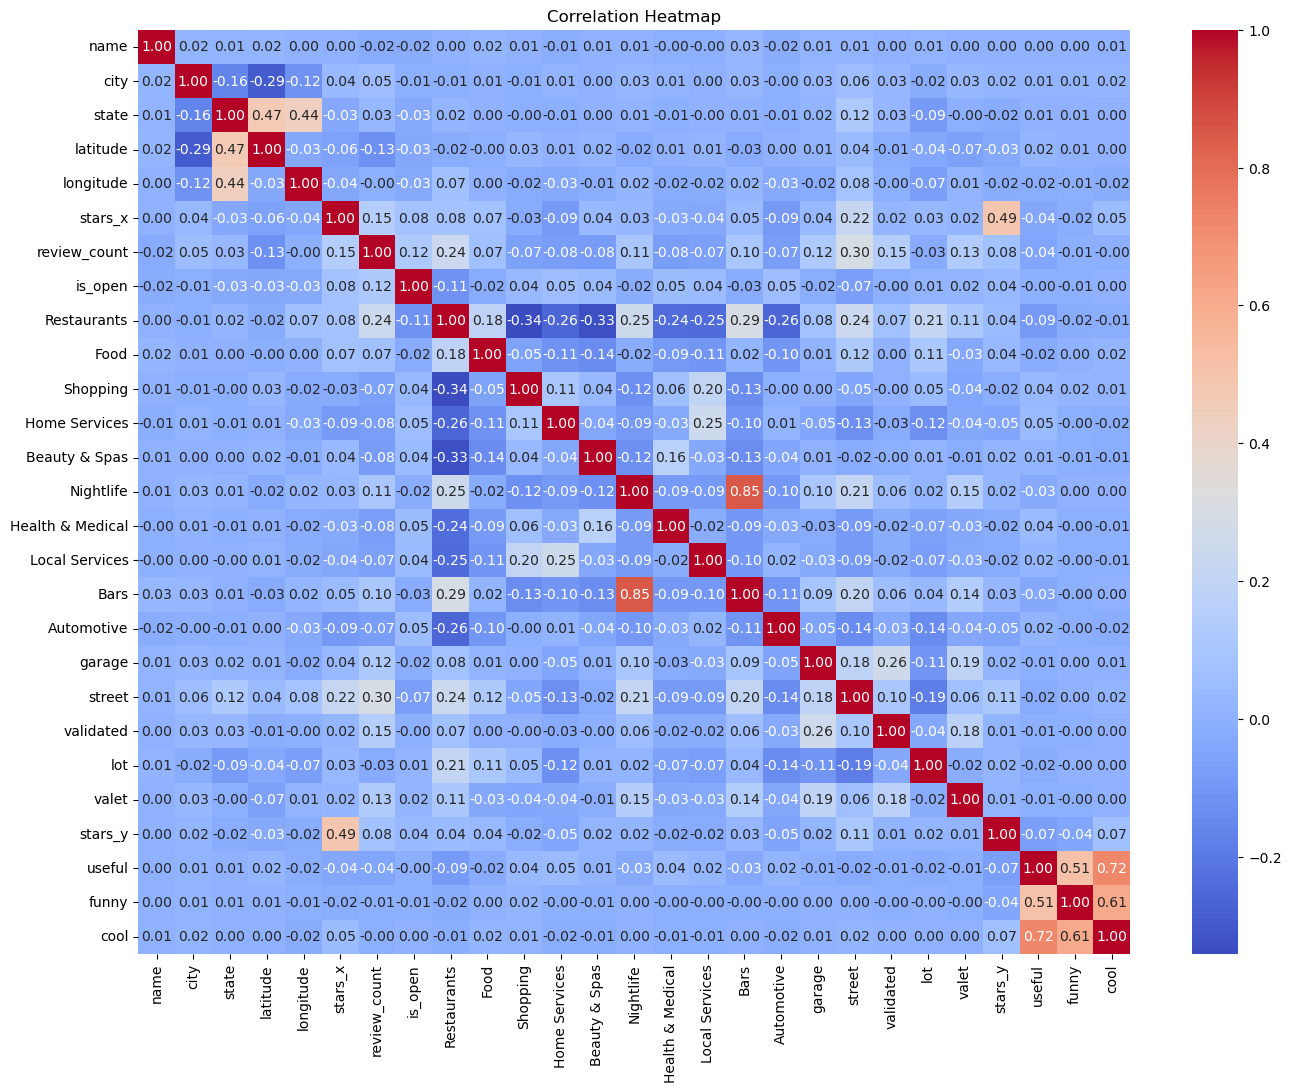

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = features_data.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [224]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 27 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              int32  
 1   city              int32  
 2   state             int32  
 3   latitude          float64
 4   longitude         float64
 5   stars_x           float64
 6   review_count      int64  
 7   is_open           int64  
 8   Restaurants       int64  
 9   Food              int64  
 10  Shopping          int64  
 11  Home Services     int64  
 12  Beauty & Spas     int64  
 13  Nightlife         int64  
 14  Health & Medical  int64  
 15  Local Services    int64  
 16  Bars              int64  
 17  Automotive        int64  
 18  garage            int64  
 19  street            int64  
 20  validated         int64  
 21  lot               int64  
 22  valet             int64  
 23  stars_y           int64  
 24  useful            int64  
 25  funny             int64  
 26  cool          

In [263]:
X = features_data.drop(columns=['latitude','longitude','validated','Bars'])
y = features_data['validated']

In [264]:
from sklearn.model_selection import StratifiedShuffleSplit
sample_size = 500000

# Create the stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=1, test_size=sample_size, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_sampled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_sampled = y.iloc[train_index], y.iloc[test_index]

# Display the shapes of the sampled DataFrames
print("Sampled X shape:", X_sampled.shape)
print("Sampled y shape:", y_sampled.shape)

# Check class distribution in sampled data
print("Class distribution in sampled y:")
print(y_sampled.value_counts(normalize=True))

Sampled X shape: (500000, 23)
Sampled y shape: (500000,)
Class distribution in sampled y:
0    0.97864
1    0.02136
Name: validated, dtype: float64


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.15, random_state=42)

In [266]:
# combined_data = pd.concat([X_train, y_train], axis=1)

# # Separate based on the target class 'validated'
# class_zero = combined_data[combined_data['validated'] == 0]
# class_one = combined_data[combined_data['validated'] == 1]

# # Find the minimum size between the two classes
# smallest_class_size = min(len(class_zero), len(class_one))

# # Sample each class to balance the dataset
# zero_sample = class_zero.sample(n=30000, random_state=42)
# one_sample = class_one.sample(n=30000, random_state=42)

# # Combine the balanced samples
# balanced_data = pd.concat([zero_sample, one_sample])

# # Shuffle the combined data
# balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Split back into features and target
# X_train= balanced_data.drop(columns=['validated'])
# y_train = balanced_data['validated']

In [267]:
print(X_train.shape)
print(y_train.shape)

(425000, 23)
(425000,)


In [268]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight

# Build the DNN model
model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(126, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

# Output layer for two targets
model.add(layers.Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 256)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 126)                 │          32,382 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 126)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           8,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,719 (182.50 KB)

 Trainable params: 46,719 (182.50 KB)

 Non-trainable params: 0 (0.00 B)

In [312]:
# import numpy as np
# from sklearn.utils.class_weight import compute_class_weight

# # Ensure y_train is in a suitable format (int)
# y_train = y_train.astype(int)

# # Calculate class weights
# classes = np.unique(y_train)
# class_weight = compute_class_weight('balanced', classes=classes, y=y_train)

# # Create class weight dictionary
# class_weight_dict = {cls: class_weight[i] for i, cls in enumerate(classes)}
# print("Class weight dictionary:", class_weight_dict)  # Debugging

# # Check for any missing classes in the class weight dictionary
# for cls in np.unique(y_train):
#     if cls not in class_weight_dict:
#         print(f"Warning: Class {cls} not found in class_weight_dict. Adding with default weight of 1.0.")
#         class_weight_dict[cls] = 1.0 

Class weight dictionary: {0: 0.5108860808185718, 1: 23.46510600706714}


In [317]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9788 - loss: 0.1149 - val_accuracy: 0.9789 - val_loss: 0.1023
Epoch 2/5
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9783 - loss: 0.1180 - val_accuracy: 0.9789 - val_loss: 0.1023
Epoch 3/5
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9783 - loss: 0.1095 - val_accuracy: 0.9789 - val_loss: 0.1023
Epoch 4/5
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9788 - loss: 0.1047 - val_accuracy: 0.9789 - val_loss: 0.1023
Epoch 5/5
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9784 - loss: 0.1127 - val_accuracy: 0.9789 - val_loss: 0.1023


In [318]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9788 - loss: 0.1027
Test Accuracy: 0.9783


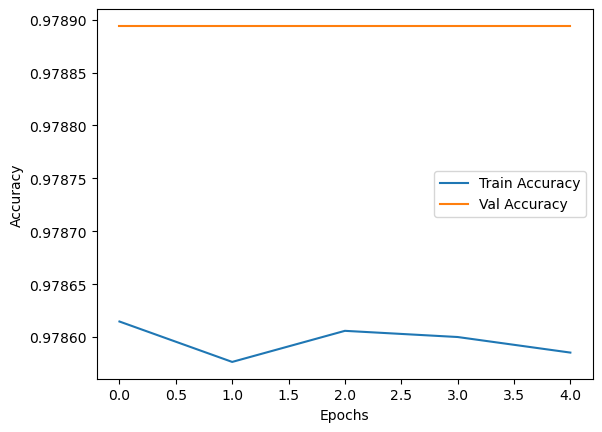

In [319]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

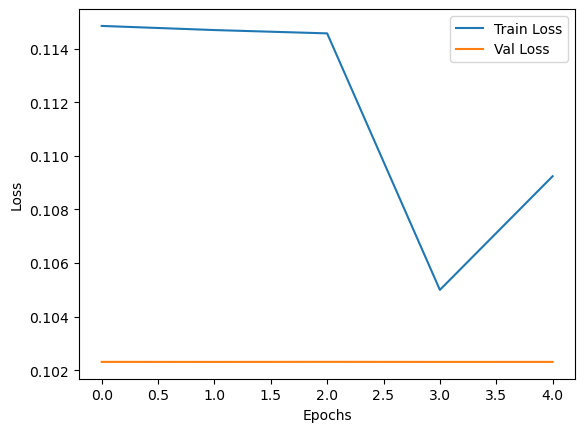

In [320]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [321]:
y_predict = model.predict(X_test)
y_predict_classes = tf.argmax(y_predict, axis=1).numpy()  # Get predicted class indices

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [322]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_predict_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     73376
           1       0.00      0.00      0.00      1624

    accuracy                           0.98     75000
   macro avg       0.49      0.50      0.49     75000
weighted avg       0.96      0.98      0.97     75000



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


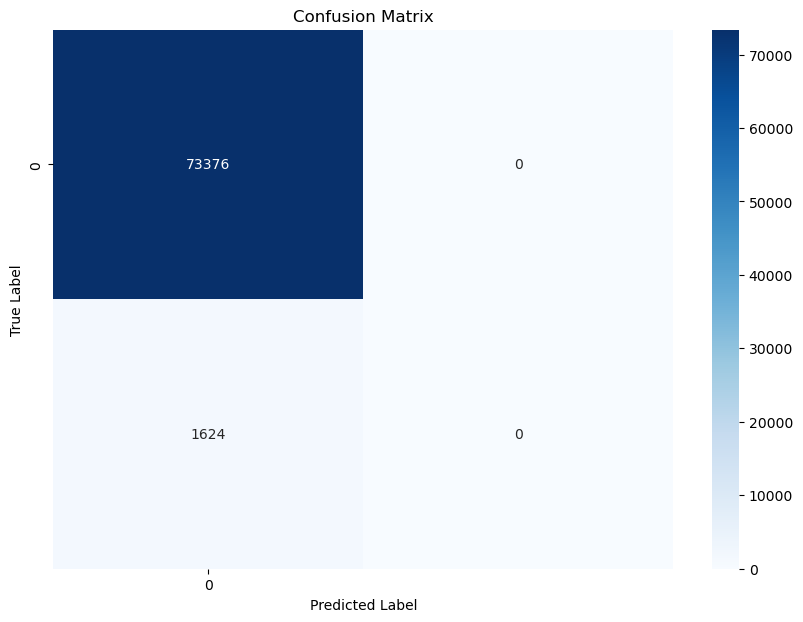

In [323]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_test, y_predict_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1), yticklabels=range(1))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [324]:
# Assuming 'model' is your trained Keras model
model.save('my_model.h5')

### saving preprocessor

In [325]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib 

In [326]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(exclude=['object']).columns


In [327]:
from sklearn.preprocessing import FunctionTransformer

def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])
    return df

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for numerical columns
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_columns),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
            ('label_encoder', FunctionTransformer(label_encode, validate=False))  # Apply label encoding
        ]), categorical_columns)
    ])

In [328]:
# Fit the preprocessor
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['name', 'city', 'state', 'stars_x', 'review_count', 'is_open',
       'Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas',
       'Nightlife', 'Health & Medical', 'Local Services', 'Automotive',
       'garage', 'street', 'lot', 'valet', 'stars_y', 'useful', 'funny',
       'cool'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label_encoder',
                                                  FunctionTransformer(func=<function label_encode at 0x0000018B8FAAA020>))]),
                                 Index([], dtype='object'))])

In [329]:
joblib.dump(preprocessor, 'preprocessor_pipeline1.pkl')
print("Preprocessor saved successfully!")

Preprocessor saved successfully!
